# Polinomio de interpolación de Lagrange

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/2_Ajuste_de_curvas/2.1_Polinomio_de_interpolacion_de_Lagrange.ipynb)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2, 5, 6, 8, 12])
y = np.array([6, 4, 5, 4, 3])
pol = np.polyfit(x,y,len(x)-1)  # coeficientes del polinomio

xx = np.linspace(min(x),max(x))
yy = np.polyval(pol,xx)

In [5]:
pol

array([ 2.30158730e-02, -6.36111111e-01,  5.99325397e+00, -2.24833333e+01,
        3.17142857e+01])

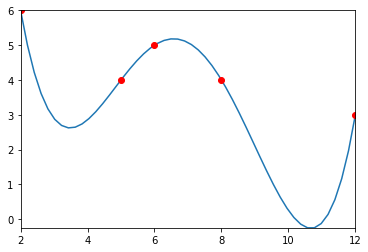

In [8]:
plt.plot(xx, yy, '-',x, y, 'ro')
plt.axis([min(xx), max(xx), min(yy), max(yy)]);

In [10]:
def LagrangePol(datos):
    """
    Implementación del interpolador de Lagrange
    Entradas:
    datos -- lista de puntos (x, y) en el plano

    Salida:
    P -- función de interpolación
    """

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1
        for i, p in enumerate(datos):
            if i != k:
                out *= (x - p[0])/(datos[k][0] - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P

In [12]:
datos = [[2,6],[5,4],[6,5],[8,4],[12,3]]
P = LagrangePol(datos)

In [13]:
P

<function __main__.LagrangePol.<locals>.P(x)>

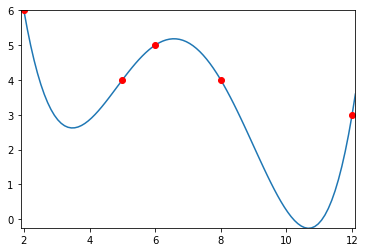

In [23]:
xx = np.linspace(1.9,12.1,100)
plt.plot(xx, P(xx), '-',x, y, 'ro')
plt.axis([min(xx), max(xx), min(yy), max(yy)]);